In [88]:
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

##### 데이터 피처 설명
- pclass : Passenger Class, 승객 등급
- survived : 생존 여부 : target 값이 됨.
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 탑승 한 형제/배우자 수
- parch : 탑승 한 부모/자녀 수
- ticket : 티켓 번호
- fare : 승객 지불 요금
- cabin : 선실 이름
- embarked : 승선항 (C = 쉘 부르그, Q = 퀸즈타운, S = 사우스 햄튼)
- body : 사망자 확인 번호 - 분석과정에서 제외해야 함. 머신러닝에 100% 영향을 미침.
- home.dest : 고향/목적지

In [89]:
df_train = pd.read_csv('titanic_train.csv')
df_train.head(2)
df_test = pd.read_csv('titanic_test.csv')
df_test.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,3,0,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S,NaN,NaN
1,2,1,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,S.O./P.P. 2,21.0000,NaN,S,NaN,"Ilfracombe, Devon"


name,cabin의 데이터를 추가

In [90]:
# 데이터 중에 ticket,body,home.dest 를 제거
df_train = df_train.drop(['ticket','body','home.dest'],axis=1)
df_train
df_test = df_test.drop(['ticket','body','home.dest'],axis=1)

In [91]:
df_test.head(2)

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked
0,3,0,"Rekic, Mr. Tido",male,38.0,0,0,7.8958,NaN,S
1,2,1,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,21.0000,NaN,S


In [92]:
# 데이터 전처리 - 결측치 
# age 데이터의 평균값으로 nan 데이터를 처리

# 결측치에 넣을 평균값 - train,test세트 모두 적용
replace_mean = df_train[df_train['age']>0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

# embark : 결측값 - 데이터 2개
# 데이터중 가장 많이 나온 결과의 값을 대체
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

In [93]:
# train,test세트 합치기
whole_df = pd.concat([df_train,df_test])

In [94]:
train_idx_num = len(df_train)

In [95]:
whole_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 392
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   fare      1309 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.5+ KB


In [96]:
# cabin 데이터 처리
# cabin : 선실 이름
whole_df['cabin'].value_counts().head()

cabin
C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F4                 4
B96 B98            4
Name: count, dtype: int64

In [97]:
# 결측치 데이터를 X 로 대체
whole_df['cabin'] = whole_df['cabin'].fillna('X')

In [98]:
# cabin의 데이터 앞 첫글자를 저장
whole_df['cabin'] = whole_df['cabin'].str[0]

In [99]:
whole_df['cabin'].value_counts()

cabin
X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [100]:
# 항목중 데이터가 적은 수는 X로 대체
whole_df['cabin'] = whole_df['cabin'].replace({'G':'X','T':'X'})

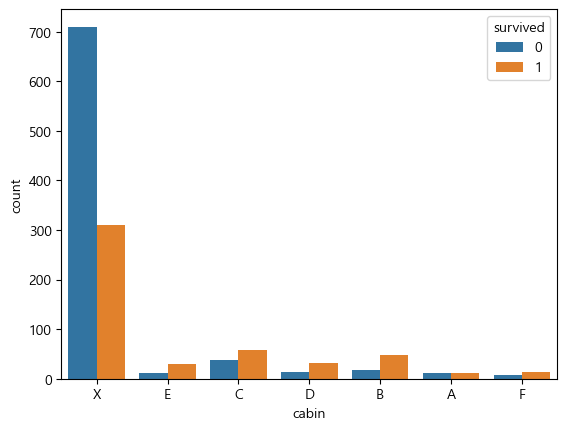

In [101]:
ax = sns.countplot(x='cabin',hue='survived',data=whole_df)

In [102]:
# name 피처 전처리
whole_df['name'].head()

0    Mellinger, Miss. Madeleine Violet
1                    Wells, Miss. Joan
2       Duran y More, Miss. Florentina
3                   Scanlan, Mr. James
4         Bradley, Miss. Bridget Delia
Name: name, dtype: object

In [103]:
# ,기준으로 분리해서 뒤에 부분을 저장
whole_df['name'] = whole_df['name'].str.split(',').str[1]

In [104]:
# .기준으로 분리해서 앞에 부분을 저장
whole_df['name'] = whole_df['name'].str.split('.').str[0].str.strip()

In [105]:
whole_df['name'].unique()

array(['Miss', 'Mr', 'Master', 'Mrs', 'Dr', 'Mlle', 'Col', 'Rev', 'Ms',
       'Mme', 'Sir', 'the Countess', 'Dona', 'Jonkheer', 'Lady', 'Major',
       'Don', 'Capt'], dtype=object)

In [106]:
# 호칭에 따른 사회적 지위를 파악
grade_dict = {'A': ['Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir'], # 명예직을 나타냅니다.
              'B': ['Ms', 'Mme', 'Mrs', 'Dona'], # 여성을 나타냅니다.
              'C': ['Jonkheer', 'the Countess'], # 귀족이나 작위를 나타냅니다.
              'D': ['Mr', 'Don'], # 남성을 나타냅니다.
              'E': ['Master'], # 젊은남성을 나타냅니다.
              'F': ['Miss', 'Mlle', 'Lady']} # 젊은 여성을 나타냅니다.

In [107]:
whole_df['name'].head()

0    Miss
1    Miss
2    Miss
3      Mr
4    Miss
Name: name, dtype: object

In [108]:
# 함수를 적용해서 데이터 적용
def give_grade(x):
    for key, value in grade_dict.items():
        for title in value:
            if x == title:
                return key
    return 'G'    
whole_df['name'] = whole_df['name'].apply(lambda x: give_grade(x))            

In [109]:
whole_df['name']

0      F
1      F
2      F
3      D
4      F
      ..
388    D
389    B
390    D
391    D
392    F
Name: name, Length: 1309, dtype: object

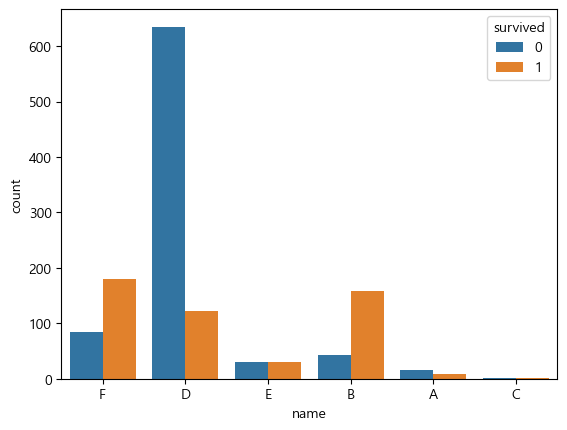

In [110]:
ax = sns.countplot(x='name',hue='survived',data=whole_df)

In [111]:
# 원핫인코딩
whole_df_encoded = pd.get_dummies(whole_df)
df_train2 = whole_df_encoded[:train_idx_num]
df_test2 = whole_df_encoded[train_idx_num:]

In [112]:
df_train2.head(2)

,pclass,survived,age,sibsp,parch,fare,name_A,name_B,name_C,name_D,...,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_X,embarked_C,embarked_Q,embarked_S
0,2,1,13.0,0,1,19.5,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,2,1,4.0,1,1,23.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [113]:
# train,test 세트 분리
# train : 916
train_input = whole_df_encoded.iloc[:train_idx_num,whole_df_encoded.columns != 'survived']
train_input
train_target = whole_df_encoded['survived'][:train_idx_num]
train_target


# target : 393
test_input = whole_df_encoded.iloc[train_idx_num:,whole_df_encoded.columns != 'survived']
test_input
test_target = whole_df_encoded['survived'][train_idx_num:]
test_target.count()

393

In [114]:
# 표준화 작업
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [115]:
from sklearn.linear_model import LogisticRegression

# 데이터 훈련시키기
lr = LogisticRegression(random_state=42)
lr.fit(train_input,train_target)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [116]:
predict = lr.predict(test_input)

In [117]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.8155021834061136
0.7938931297709924
